# **Import** **Train,Test,Split** **Cleaning**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns #Data Visualization
import matplotlib.pyplot as plt

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score, precision_score, recall_score ,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data/flood_risk_dataset_india.csv")

In [ ]:
df.columns


Index(['Latitude', 'Longitude', 'Rainfall (mm)', 'Temperature (°C)',
       'Humidity (%)', 'River Discharge (m³/s)', 'Water Level (m)',
       'Elevation (m)', 'Land Cover', 'Soil Type', 'Population Density',
       'Infrastructure', 'Historical Floods', 'Flood Occurred'],
      dtype='object')

In [ ]:
df.head(5)

,Latitude,Longitude,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Land Cover,Soil Type,Population Density,Infrastructure,Historical Floods,Flood Occurred
0,18.861663,78.835584,218.999493,34.144337,43.912963,4236.182888,7.415552,377.465433,Water Body,Clay,7276.742184,1,0,1
1,35.570715,77.654451,55.353599,28.778774,27.585422,2472.585219,8.811019,7330.608875,Forest,Peat,6897.736956,0,1,0
2,29.227824,73.108463,103.991908,43.934956,30.108738,977.328053,4.631799,2205.873488,Agricultural,Loam,4361.518494,1,1,1
3,25.361096,85.610733,198.984191,21.569354,34.453690,3683.208933,2.891787,2512.277800,Desert,Sandy,6163.069701,1,1,0
4,12.524541,81.822101,144.626803,32.635692,36.292267,2093.390678,3.188466,2001.818223,Agricultural,Loam,6167.964591,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Latitude                10000 non-null  float64
 1   Longitude               10000 non-null  float64
 2   Rainfall (mm)           10000 non-null  float64
 3   Temperature (°C)        10000 non-null  float64
 4   Humidity (%)            10000 non-null  float64
 5   River Discharge (m³/s)  10000 non-null  float64
 6   Water Level (m)         10000 non-null  float64
 7   Elevation (m)           10000 non-null  float64
 8   Land Cover              10000 non-null  object 
 9   Soil Type               10000 non-null  object 
 10  Population Density      10000 non-null  float64
 11  Infrastructure          10000 non-null  int64  
 12  Historical Floods       10000 non-null  int64  
 13  Flood Occurred          10000 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memo

In [ ]:
df.describe()

,Latitude,Longitude,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Population Density,Infrastructure,Historical Floods,Flood Occurred
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,22.330627,82.631366,150.015118,29.961401,59.749104,2515.722946,5.017881,4417.138177,5021.468442,0.502000,0.498700,0.505700
std,8.341274,8.389542,86.032127,8.669838,23.142734,1441.706442,2.876579,2530.245421,2882.591520,0.500021,0.500023,0.499993
min,8.000337,68.004575,0.014437,15.000166,20.001339,0.042161,0.002701,1.150340,2.289000,0.000000,0.000000,0.000000
25%,15.143537,75.364428,76.124373,22.405717,39.541778,1284.782376,2.538847,2229.681903,2491.766601,0.000000,0.000000,0.000000
50%,22.283330,82.671007,150.620428,30.000907,59.497375,2530.451944,5.042094,4417.199761,5074.392879,1.000000,0.000000,1.000000
75%,29.460184,89.937897,223.402156,37.413488,80.038163,3767.229862,7.524692,6616.729066,7474.228752,1.000000,1.000000,1.000000
max,36.991813,96.997820,299.970293,44.993681,99.997772,4999.698480,9.996899,8846.894877,9999.169530,1.000000,1.000000,1.000000


In [ ]:
df.isnull().sum()

,0
Latitude,0
Longitude,0
Rainfall (mm),0
Temperature (°C),0
Humidity (%),0
River Discharge (m³/s),0
Water Level (m),0
Elevation (m),0
Land Cover,0
Soil Type,0


# Graphs

## Outlier Checking (Box Plot)

In [ ]:
columns = df.columns
for i in range(8):
  fig = plt.figure(figsize = (10,5))
  ax = fig.gca()
  df.boxplot(column=columns[i], by= "Flood Occurred", ax=ax)
  plt.ylabel(columns[i])
  plt.xlabel("Flood Occurred")

NameError: name 'df' is not defined

## Pie Chart

Text(0, 0.5, '')

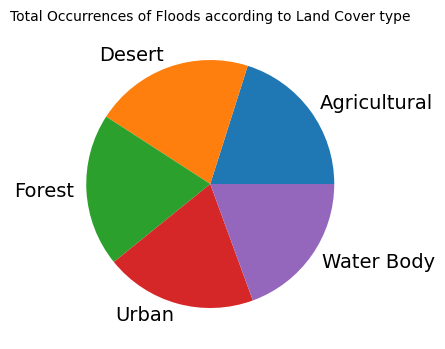

In [ ]:
ax1 = df.groupby(["Land Cover"])["Flood Occurred"].sum().plot.pie(
    figsize=(4, 5),
    fontsize=14
)
ax1.set_title("Total Occurrences of Floods according to Land Cover type", fontsize=10)
ax1.set_xlabel("")
ax1.set_ylabel("")


Text(0, 0.5, '')

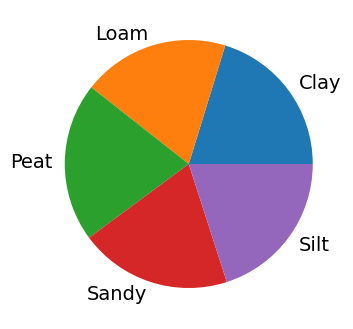

In [ ]:
ax1 = df.groupby(["Soil Type"])["Flood Occurred"].sum().plot.pie(
    figsize = (4,5),
    fontsize = 14
)
ax.set_title("Total Occurences of Floods according to Soil type" , fontsize = 10)
ax1.set_xlabel("")
ax1.set_ylabel("")

## Histograms

Text(0.5, 1.0, 'Total Occurences of Floods according to Land Cover type')

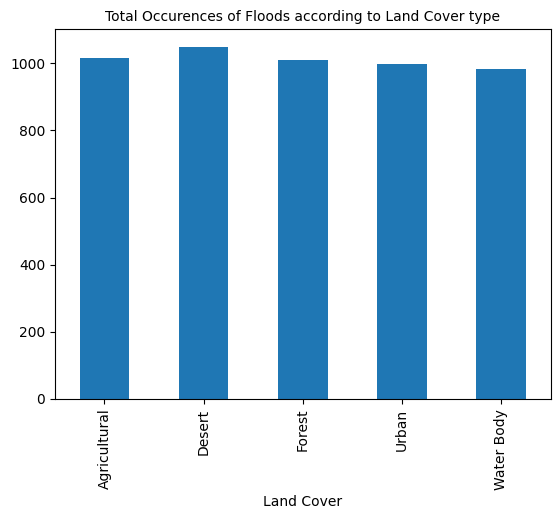

In [ ]:
ax = df.groupby(["Land Cover"])["Flood Occurred"].sum().plot.bar()
ax.set_title("Total Occurences of Floods according to Land Cover type" , fontsize = 10)

Text(0.5, 1.0, 'Total Occurences of Floods according to Soil type')

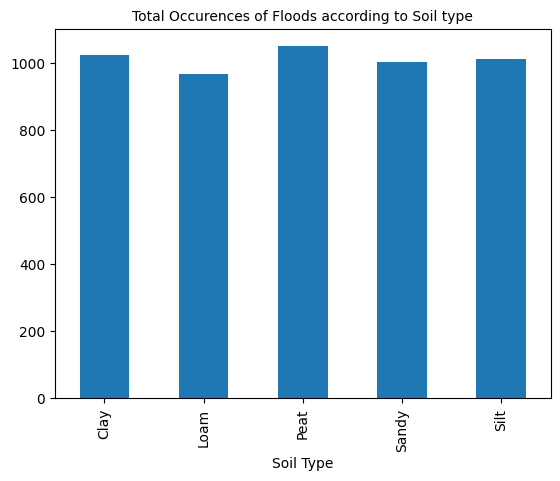

In [ ]:
ax = df.groupby(["Soil Type"])["Flood Occurred"].sum().plot.bar()
ax.set_title("Total Occurences of Floods according to Soil type" , fontsize = 10)

# Data Cleaning

In [ ]:
df = df[['Latitude', 'Longitude', 'Rainfall (mm)', 'River Discharge (m³/s)', 'Water Level (m)',
       'Elevation (m)', 'Historical Floods', 'Flood Occurred']]

# Spliting

In [ ]:
x = df.drop(['Flood Occurred'], axis = 1)
y = df['Flood Occurred']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Scaling

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train[0:30]

array([[0.42392117, 0.23505257, 0.24030819, 0.82684089, 0.45499321,
        0.24473437, 0.        ],
       [0.33625255, 0.44972495, 0.76471264, 0.48168703, 0.92644018,
        0.53649949, 0.        ],
       [0.86553856, 0.94029546, 0.08356645, 0.88725778, 0.61851185,
        0.23422236, 1.        ],
       [0.27876463, 0.02148658, 0.12691308, 0.54956792, 0.71816002,
        0.76508843, 0.        ],
       [0.02650747, 0.78620805, 0.4604005 , 0.32732872, 0.14957982,
        0.37908885, 0.        ],
       [0.18489717, 0.98527907, 0.91031303, 0.77675876, 0.33013642,
        0.3712336 , 1.        ],
       [0.76946512, 0.51711867, 0.18721326, 0.1749821 , 0.89820621,
        0.11431353, 1.        ],
       [0.10143901, 0.06933839, 0.1102904 , 0.70109666, 0.88779592,
        0.90689429, 1.        ],
       [0.66215285, 0.39334745, 0.77025237, 0.96807707, 0.34841877,
        0.72640876, 1.        ],
       [0.5838161 , 0.52859521, 0.40495725, 0.16849249, 0.2180771 ,
        0.73867377, 1. 

# Models

## Logistic Regression

In [ ]:
model = LogisticRegression(fit_intercept= True , max_iter = 10000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [ ]:
model.coef_

array([[-0.01410992, -0.17579953, -0.00656507, -0.01322617, -0.0846682 ,
         0.00978532,  0.00760269]])

In [ ]:
model.intercept_

array([0.14878701])

In [ ]:
train_pred_prob = model.predict_proba(x_train)
test_pred_prob = model.predict_proba(x_test)

In [ ]:
print(train_pred_prob)

[[0.48679278 0.51320722]
 [0.50489994 0.49510006]
 [0.5208595  0.4791405 ]
 ...
 [0.50867911 0.49132089]
 [0.47409429 0.52590571]
 [0.49808335 0.50191665]]


In [ ]:
print(test_pred_prob)

[[0.51395011 0.48604989]
 [0.47719499 0.52280501]
 [0.50146433 0.49853567]
 ...
 [0.5127809  0.4872191 ]
 [0.51020067 0.48979933]
 [0.51091284 0.48908716]]


In [ ]:
train_class_pred =model.predict(x_train)
test_class_pred = model.predict(x_test)

In [ ]:
print(train_class_pred)

[1 0 0 ... 0 1 1]


In [ ]:
print(test_class_pred)

[0 1 0 ... 0 0 0]


### Scores

#### Accuracy Score

In [ ]:
train_accuracy = accuracy_score(train_class_pred , y_train)
test_accuracy = accuracy_score(test_class_pred , y_test)

In [ ]:
print(train_accuracy)

0.509


In [ ]:
print(test_accuracy)

0.4905


#### Precision Score

In [ ]:
train_precision = precision_score(train_class_pred ,y_train)
test_precision = precision_score(test_class_pred , y_test)


In [ ]:
train_precision

0.5625777556606121

In [ ]:
test_precision

0.546242774566474

#### F1 Score

In [ ]:
train_f1 = f1_score(train_class_pred ,y_train)
test_f1 = f1_score(test_class_pred , y_test)

In [ ]:
train_f1

0.5351479289940828

In [ ]:
test_f1

0.5267069205759406

#### Recall Score

In [ ]:
train_recall = recall_score(train_class_pred ,y_train)
test_recall = recall_score(test_class_pred , y_test)

In [ ]:
train_recall

0.5102685624012638

In [ ]:
test_recall

0.5085201793721973

#### Confusion Matrix

In [ ]:
labels = ['Retained','Churn']
train_cm = confusion_matrix(y_train , train_class_pred)

In [ ]:
train_cm

array([[1811, 2170],
       [1758, 2261]])

## Decision Tree

In [ ]:
flood_outcome_classifier = DecisionTreeClassifier(criterion ='entropy' , max_leaf_nodes = 2, random_state = 0)
flood_outcome_classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=2, random_state=0)

In [ ]:
train_class_dt_pred = flood_outcome_classifier.predict(x_train)
test_class_dt_pred = flood_outcome_classifier.predict(x_test)

In [ ]:
yc_train_pred = flood_outcome_classifier.predict(x_train)

In [ ]:
yc_train_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
yc_test_pred = flood_outcome_classifier.predict(x_test)

In [ ]:
yc_test_pred

array([1, 1, 1, ..., 1, 1, 1])

### Scores

#### Accuracy Score

In [ ]:
accuracy_score(y_test,yc_test_pred)

0.502

In [ ]:
accuracy_score(y_train,yc_train_pred)

0.502375

#### Recall Score

In [ ]:
recall_score(y_test,yc_test_pred)

0.48265895953757226

In [ ]:
recall_score(y_train,yc_train_pred)

1.0

#### Precision Score

In [ ]:
precision_score(y_test,yc_test_pred)

0.521875

In [ ]:
precision_score(y_train,yc_train_pred)

1.0

#### F1 Score

In [ ]:
f1_score(y_test,yc_test_pred)

0.5015015015015015

In [ ]:
f1_score(y_train,yc_train_pred)

1.0

#### Confusion Matrix

In [ ]:
labels = ['Safe','Flood Occured']
train_dt_cm = confusion_matrix(y_train , train_class_dt_pred)

In [ ]:
train_dt_cm

array([[3981,    0],
       [   0, 4019]])

In [ ]:
labels = ['Safe','Flood Occured']
test_dt_cm = confusion_matrix(y_test , test_class_dt_pred)

In [ ]:
test_dt_cm

array([[503, 459],
       [537, 501]])

## Random Forest

In [ ]:
flood_outcome_rf_classifier = RandomForestClassifier(criterion ='entropy' ,max_leaf_nodes=2, random_state = 0)
flood_outcome_rf_classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_leaf_nodes=2, random_state=0)

In [ ]:
train_class_rf_pred = flood_outcome_classifier.predict(x_train)
test_class_rf_pred = flood_outcome_classifier.predict(x_test)

In [ ]:
yr_train_pred = flood_outcome_classifier.predict(x_train)
yr_train_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
yr_test_pred = flood_outcome_classifier.predict(x_test)
yr_test_pred

array([1, 1, 1, ..., 1, 1, 1])

### Score

### Accuracy Score

In [ ]:
accuracy_score(y_test,yr_test_pred)

0.519

In [ ]:
accuracy_score(y_train,yr_train_pred)

0.502375

### Precision Score

In [ ]:
precision_score(y_test,yr_test_pred)

0.521875

In [ ]:
precision_score(y_train,yr_train_pred)

1.0

### F1 Score

In [ ]:
f1_score(y_test,yr_test_pred)

0.5015015015015015

In [ ]:
f1_score(y_train,yr_train_pred)

1.0

### Recall Score

In [ ]:
recall_score(y_test,yr_test_pred)

0.48265895953757226

In [ ]:
recall_score(y_train,yr_train_pred)

1.0

### Confusion Matrix

In [ ]:
labels = ['Safe','Flood Occured']
train_rf_cm = confusion_matrix(y_train , train_class_rf_pred)
test_rf_cm = confusion_matrix(y_test , test_class_rf_pred)

In [ ]:
test_rf_cm

array([[503, 459],
       [537, 501]])

In [ ]:
train_rf_cm

array([[3981,    0],
       [   0, 4019]])